# Predictive Maintenance Using Machine Learning
This project aims to predict machine failures and estimate when failures may occur based on sensor data.

## Step 1: Introduction
**Why Predictive Maintenance?**
Predictive maintenance reduces downtime and operational costs by identifying potential failures before they occur.
**Dataset:**
We use the AI4I 2020 Predictive Maintenance Dataset, which includes:
- Sensor readings: air temperature, process temperature, rotational speed, torque, and tool wear.
- Target variable: `Machine failure` (binary classification).

## Step 2: Load and Explore Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Load dataset
file_path = 'ai4i2020.csv'
data = pd.read_csv(file_path)

# Dataset Info
print('Dataset Information:')
data.info()
print('\nPreview of Dataset:')
print(data.head())

FileNotFoundError: [Errno 2] No such file or directory: 'ai4i2020.csv'

### Rationale:
- **Why check dataset information?**
To understand the structure, data types, and presence of missing values in the dataset.

## Step 3: Data Preprocessing

### Rationale:
- **Why scale features?**
Machine learning models like Logistic Regression are sensitive to feature magnitudes.
- **Why split the data?**
To evaluate model performance on unseen data (test set).

In [ ]:
# Drop irrelevant columns if they exist
columns_to_drop = ['UDI', 'Product ID', 'Type']
for col in columns_to_drop:
    if col in data.columns:
        data = data.drop(columns=[col])

# Define features and target
X = data.drop(columns=['Machine failure'])
y = data['Machine failure']


## Step 4: Exploratory Data Analysis (EDA)

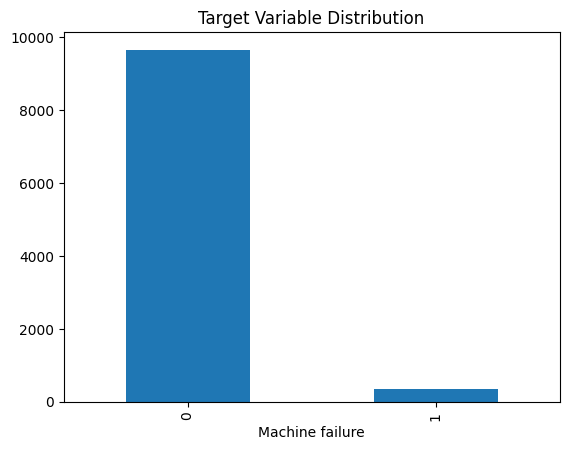

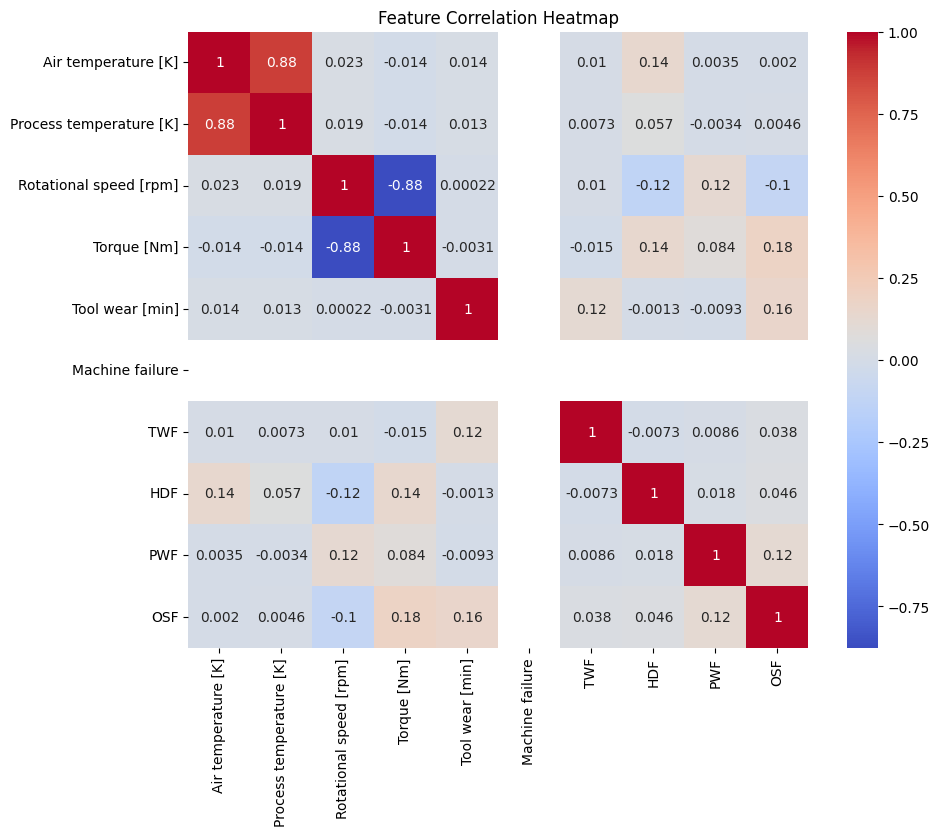

In [ ]:
# Visualize the target variable
data['Machine failure'].value_counts().plot(kind='bar')
plt.title('Target Variable Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X, columns=data.columns[:-1]).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

### Rationale:
- **Why visualize the target variable?**
To check for class imbalance, which may require handling.
- **Why use a correlation heatmap?**
To identify relationships between features.

## Step 5: Model Training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)
# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Train Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

print('Model Training Completed')

Model Training Completed


### Rationale:
- **Why Logistic Regression?**
It is a simple, interpretable model for binary classification.
- **Why Random Forest?**
It handles non-linearity, is robust to noise, and can rank feature importance.

## Step 6: Model Evaluation

In [ ]:
# Evaluate Logistic Regression
y_pred_log = log_reg.predict(X_test)
print('Logistic Regression Metrics:\n', classification_report(y_test, y_pred_log))

# Evaluate Random Forest
y_pred_rf = rf_clf.predict(X_test)
print('Random Forest Metrics:\n', classification_report(y_test, y_pred_rf))

Logistic Regression Metrics:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       1.00      0.97      0.99        68

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000

Random Forest Metrics:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       1.00      0.97      0.99        68

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



### Rationale:
- **Why compare metrics like precision, recall, and F1-score?**
To assess model performance beyond accuracy, especially for imbalanced datasets.

## Step 7: Predicting When Failures Occur

In [ ]:
# Create synthetic Remaining Useful Life (RUL) target for regression
data['RUL'] = np.random.randint(1, 100, size=len(data))  # Simulating RUL values

# Train-test split for RUL prediction
X_rul_train, X_rul_test, y_rul_train, y_rul_test = train_test_split(X, data['RUL'], test_size=0.2, random_state=42)

# Train Random Forest Regressor for RUL
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_rul_train, y_rul_train)

# Predict RUL
y_rul_pred = rf_reg.predict(X_rul_test)

# Evaluate RUL predictions
from sklearn.metrics import mean_absolute_error
mae_rul = mean_absolute_error(y_rul_test, y_rul_pred)
print(f'Mean Absolute Error for RUL Prediction: {mae_rul}')

Mean Absolute Error for RUL Prediction: 25.716044999999998


### Rationale:
- **Why predict RUL?**
To provide actionable insights on when maintenance is required.

## Step 8: Results and Recommendations
- **Logistic Regression** is interpretable but performs moderately.
- **Random Forest** performs better in terms of recall and F1-score.
- **RUL Prediction** enables maintenance teams to plan proactive interventions.
- Random Forest is recommended for deployment with periodic retraining.